# 0. EDA Process

항공사 지연요인 데이터 탐색적 분석

data 다운 경로 및 출처
https://www.kaggle.com/datasets/pitterman/airline-stats

- airline : 항공사
- carrier_delay : 항공사 지연 요인  
- atc_delay : ATC 항공교통관제 지연 요인  
- weather_delay : 날씨로 인한 지연 요인

In [1]:
import pandas as pd
import numpy as np

## 1. 변수 탐색

- 범주형 변수 : airline
- 수치형 변수 : carrier_delay, atc_delay, weather_delay 변수 - 퍼센트

In [4]:
df = pd.read_csv('../data/airline_stats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [5]:
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [7]:
df.airline.unique(), df['airline'].value_counts()

(array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
       dtype=object),
 airline
 Delta        9107
 American     5725
 Southwest    5584
 United       5426
 Alaska       3851
 Jet Blue     3775
 Name: count, dtype: int64)

## 2. 수치형변수의 통계량 확인

In [9]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


항공사요인의 경우, 

American이 평균 9.04%, Jet Blue 8.08% 순이다.  
표준편차가 가장 큰 항공사는 United로 5.36%이다. --> 변동성이 크다

In [11]:
# 항공사별 기술통계량 확인
df.groupby('airline').describe()

pct_carrier_delay                                               \
                      count      mean       std  min       25%       50%   
airline                                                                    
Alaska               3851.0  3.521889  2.483224  0.0  1.935484  3.225806   
American             5723.0  9.042180  4.139067  0.0  6.338538  8.428571   
Delta                9095.0  6.333460  4.695292  0.0  3.813989  5.548387   
Jet Blue             3773.0  8.081843  3.797737  0.0  5.341176  7.657895   
Southwest            5584.0  7.521997  3.345085  0.0  5.070294  6.960930   
United               5414.0  7.398833  5.369283  0.0  4.034708  6.445210   

                                 pct_atc_delay            ...            \
                 75%         max         count      mean  ...       75%   
airline                                                   ...             
Alaska      4.685599   22.290323        3851.0  5.472672  ...  7.001330   
American   10.988763   50.000000        5723.0  5.993529  ...  7.594450   
Delta       7.821952  100.000000        9095.0  4.462978  ...  5.839901   
Jet Blue   10.280000   28.000000        3773.0  7.345231  ...  9.612903   
Southwest   9.354839   24.800000        5584.0  3.147019  ...  3.790421   
United      9.633110  100.000000        5414.0  5.348133  ...  7.030109   

                      pct_weather_delay                                     \
                  max             count      mean       std  min       25%   
airline                                                                      
Alaska      54.838710            3851.0  0.513497  1.136494  0.0  0.000000   
American    60.000000            5723.0  1.122920  1.097811  0.0  0.296719   
Delta      100.000000            9095.0  0.680765  1.093255  0.0  0.000000   
Jet Blue    40.986111            3773.0  0.465327  0.764147  0.0  0.000000   
Southwest   21.542722            5584.0  0.512611  0.649631  0.0  0.105675   
United     100.000000            5414.0  0.680697  1.338433  0.0  0.000000   

                                          
                50%       75%        max  
airline                                   
Alaska     0.000000  0.497395  14.633803  
American   0.884354  1.641725  12.500000  
Delta      0.316406  0.893346  20.500000  
Jet Blue   0.157312  0.666667   9.923077  
Southwest  0.305598  0.663306   6.240987  
United     0.263780  0.861395  33.333333  

[6 rows x 24 columns]

In [18]:
df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

In [15]:
df.groupby('airline')['pct_carrier_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Alaska,3851.0,3.521889,2.483224,0.0,1.935484,3.225806,4.685599,22.290323
American,5723.0,9.042180,4.139067,0.0,6.338538,8.428571,10.988763,50.000000
Delta,9095.0,6.333460,4.695292,0.0,3.813989,5.548387,7.821952,100.000000
Jet Blue,3773.0,8.081843,3.797737,0.0,5.341176,7.657895,10.280000,28.000000
Southwest,5584.0,7.521997,3.345085,0.0,5.070294,6.960930,9.354839,24.800000
United,5414.0,7.398833,5.369283,0.0,4.034708,6.445210,9.633110,100.000000


In [16]:
df.groupby('airline')['pct_atc_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Alaska,3851.0,5.472672,5.699303,0.0,1.878614,3.776860,7.001330,54.838710
American,5723.0,5.993529,4.647170,0.0,3.108403,4.986523,7.594450,60.000000
Delta,9095.0,4.462978,4.364335,0.0,1.818182,3.508108,5.839901,100.000000
Jet Blue,3773.0,7.345231,5.227372,0.0,3.784314,6.136905,9.612903,40.986111
Southwest,5584.0,3.147019,2.513162,0.0,1.612527,2.559242,3.790421,21.542722
United,5414.0,5.348133,4.992464,0.0,2.431308,4.353647,7.030109,100.000000


In [17]:
df.groupby('airline')['pct_weather_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Alaska,3851.0,0.513497,1.136494,0.0,0.000000,0.000000,0.497395,14.633803
American,5723.0,1.122920,1.097811,0.0,0.296719,0.884354,1.641725,12.500000
Delta,9095.0,0.680765,1.093255,0.0,0.000000,0.316406,0.893346,20.500000
Jet Blue,3773.0,0.465327,0.764147,0.0,0.000000,0.157312,0.666667,9.923077
Southwest,5584.0,0.512611,0.649631,0.0,0.105675,0.305598,0.663306,6.240987
United,5414.0,0.680697,1.338433,0.0,0.000000,0.263780,0.861395,33.333333


## 3. 결측치 확인

In [19]:
df.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

## 4. 시각적 분석

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

지연요인별 도수가 차이가 있음.   
항공사 지연 요인은 첫번째 구간이 12천, 두번째 구간이 15천이다.   
ATC 지연 요인은 첫번째 구간이 2만으로 가장 높다.   
날씨 지연 요인은 첫번째 구간이 3만으로 다른 요인들에 비해 높다. 

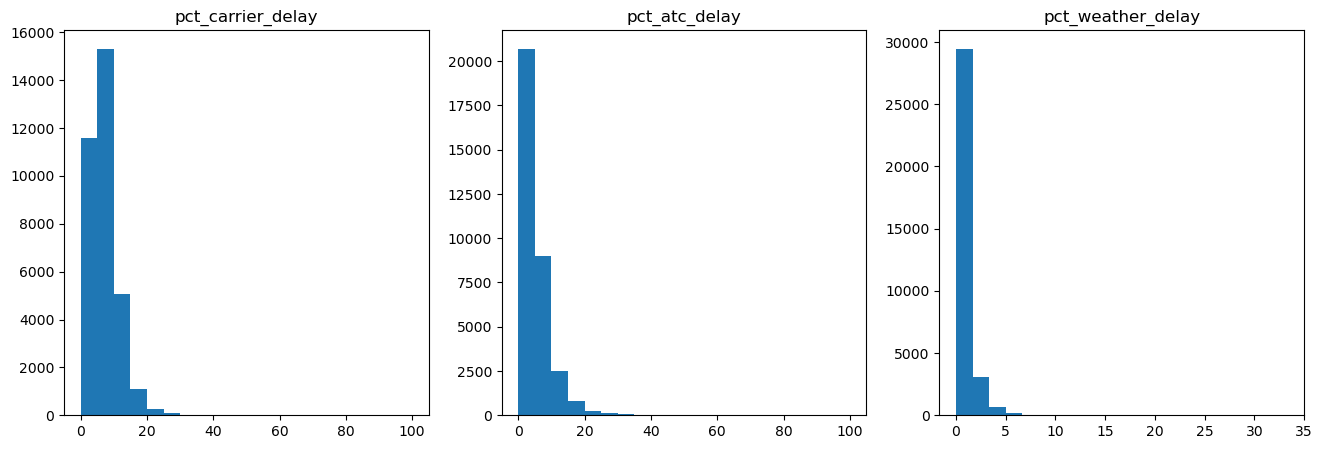

In [25]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df.pct_carrier_delay, bins=20)
ax2.hist(df.pct_atc_delay, bins=20)
ax3.hist(df.pct_weather_delay, bins=20)

ax1.set_title('pct_carrier_delay')
ax2.set_title('pct_atc_delay')
ax3.set_title('pct_weather_delay')

plt.show()

지연 유형별 중앙값, 사분위수, 이상치를 확인

1) 항공사 지연 : 20% 이상인 경우를 이상치로 판단, 100에 육박하는 극단적인 지연율도 있다.
2) ATC 지연 : 항공사 지연보다는 낮은 수준에서 이상치로 판단, 역시 100인 극단적인 지연도 있으나 항공사 지연 요인보다는 빈번하지 않다.
3) 날씨 지연 : 중앙값, IQR 자체가 작다(발생하는 범위 자체가 작다), 이상치가 20이상인 경우이고 다른 요인들에 비해 상대적으로 빈번하지 않다.

<Axes: >

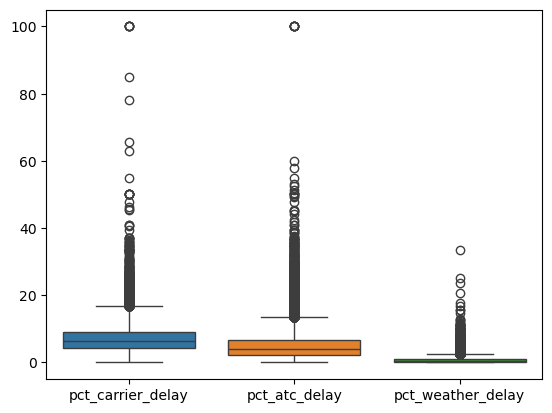

In [26]:
sns.boxplot(data=df)

In [31]:
df.groupby('airline')

항공사 지연 요인을 항공사별로 분석하면,   

Delta, United 항공사가 중앙값은 다른 항공사에 비해 크지 않다. 그러나 이상치가 많이 보인다.   
Alaska가 전반적으로 발생율이 낮은 편이다.  


<Axes: xlabel='airline', ylabel='pct_carrier_delay'>

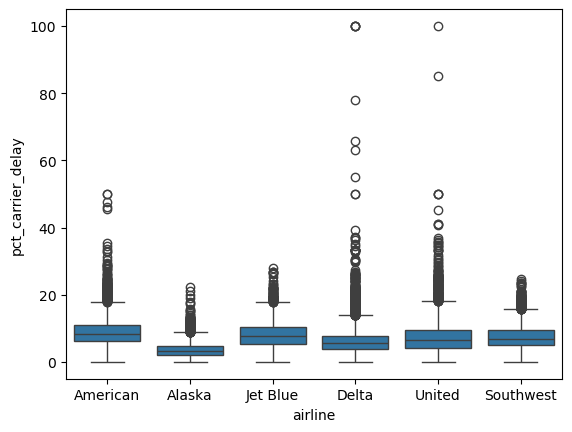

In [33]:
# 항공사별로 상자그림 - 항공사별 요인
sns.boxplot(data=df, x='airline', y='pct_carrier_delay')

<Axes: xlabel='airline', ylabel='pct_atc_delay'>

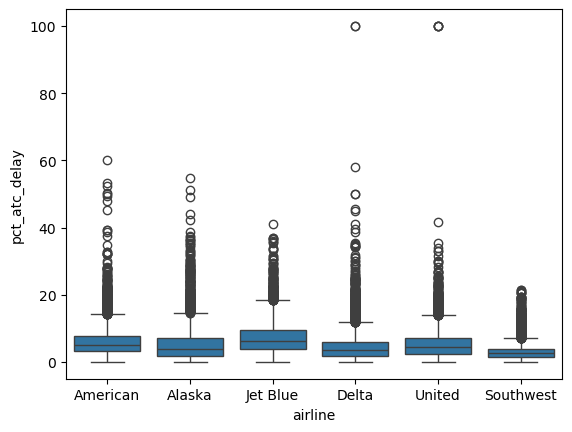

In [35]:
sns.boxplot(data=df, x='airline', y='pct_atc_delay')

<Axes: xlabel='airline', ylabel='pct_weather_delay'>

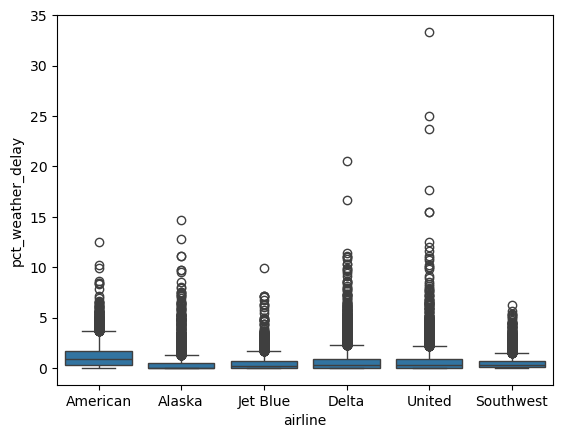

In [36]:
sns.boxplot(data=df, x='airline', y='pct_weather_delay')

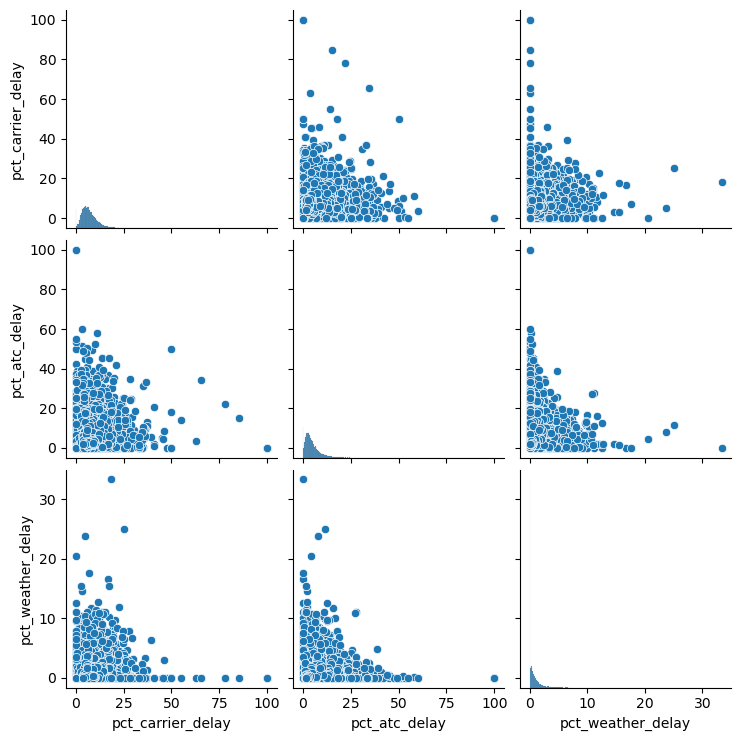

In [37]:
sns.pairplot(df)

1. 항공사 요인 vs. ATC 요인 간 상관계수가 0.14로 약한 상관관계가 있음을 확인   
2. 항공사 요인 vs. 날씨 요인 간 상관계수가 0.16으로 역시 약한 상관관계가 있음을 확인. 이것은 항공사 지연이 발생했을 때 기상지연도 발생할 수 있다는 것을 의미하지만 상당부분 두 지연요인은 독립적으로 발생하는 것으로 보인다.
3. ATC 요인 vs. 날씨 요인은 상관계수가 0.092로 거의 상관이 없다고 볼 수 있다. 서로 독립적으로 발생하는 경향이 있음을 의미한다.


In [45]:
# 상관관계 시각화
df.corr(numeric_only=True)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


<Axes: >

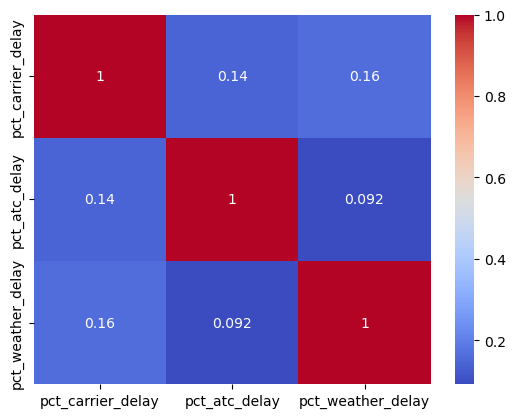

In [46]:
cor_matrix = df.corr(numeric_only=True)
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')

## 5. 결측치 처리

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [47]:
df_cleaned = df.dropna()
df_cleaned

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [49]:
df_cleaned.isnull().sum()

pct_carrier_delay    0
pct_atc_delay        0
pct_weather_delay    0
airline              0
dtype: int64

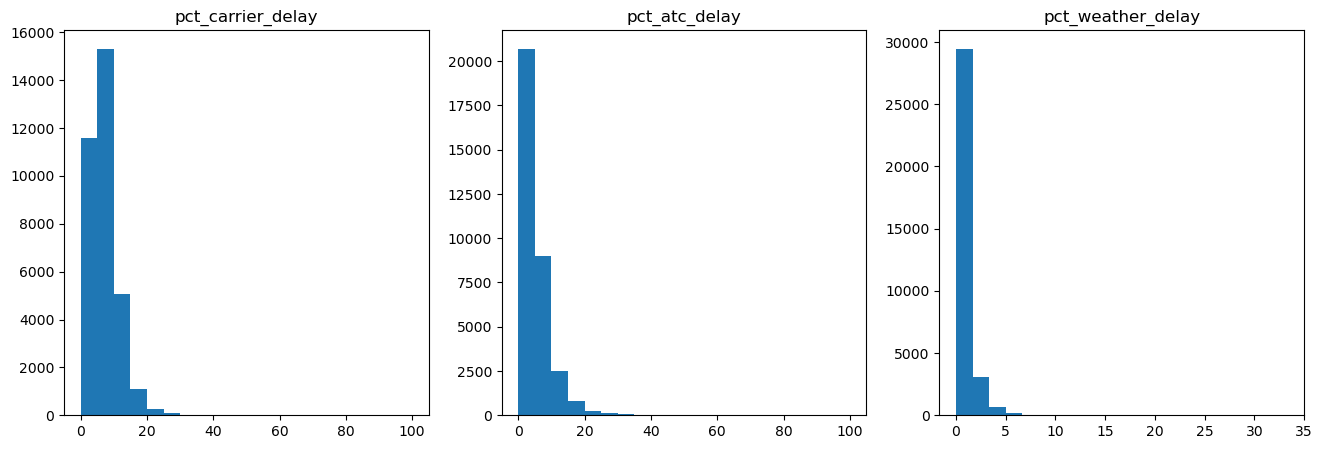

In [50]:
# 결측치가 제거된 데이터로 시각적분석, 상관관계 분석을 수행
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.hist(df_cleaned.pct_carrier_delay, bins=20)
ax2.hist(df_cleaned.pct_atc_delay, bins=20)
ax3.hist(df_cleaned.pct_weather_delay, bins=20)

ax1.set_title('pct_carrier_delay')
ax2.set_title('pct_atc_delay')
ax3.set_title('pct_weather_delay')

plt.show()

<Axes: >

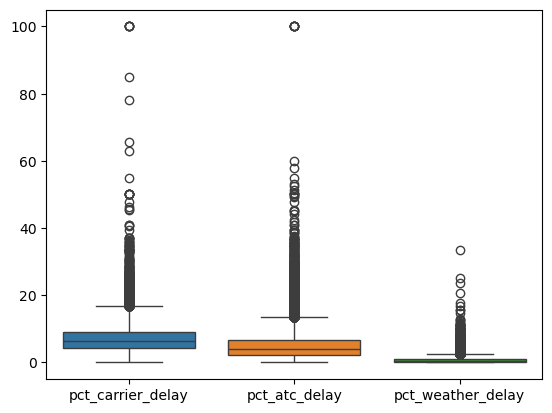

In [51]:
sns.boxplot(data=df_cleaned)

<Axes: xlabel='airline', ylabel='pct_carrier_delay'>

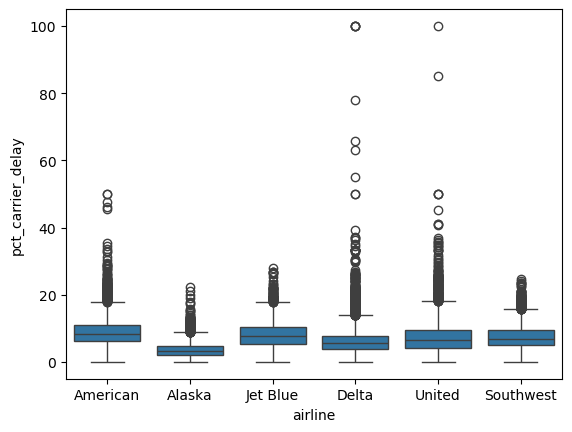

In [52]:
sns.boxplot(data=df_cleaned, x='airline', y='pct_carrier_delay')

In [56]:
cleaned_cor_matrix=df_cleaned.corr(numeric_only=True)
cleaned_cor_matrix

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


<Axes: >

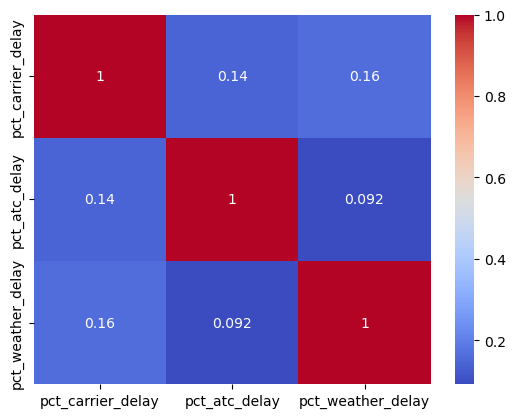

In [55]:
sns.heatmap(cleaned_cor_matrix, annot=True, cmap='coolwarm')

<Figure size 2400x800 with 0 Axes>

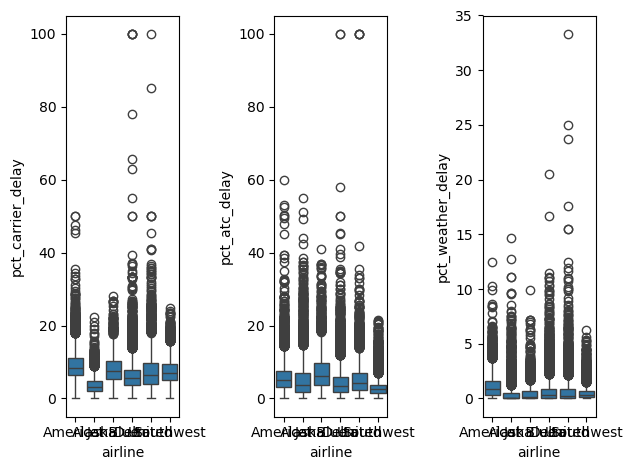

In [78]:
box = plt.figure(figsize=(24,8))
box, ax = plt.subplots(1,3)
sns.boxplot(data=df, x='airline', y='pct_carrier_delay', ax = ax[0])
sns.boxplot(data=df, x='airline', y='pct_atc_delay', ax = ax[1])
sns.boxplot(data=df, x='airline', y='pct_weather_delay', ax = ax[2])
box.set_tight_layout(True)
plt.show()

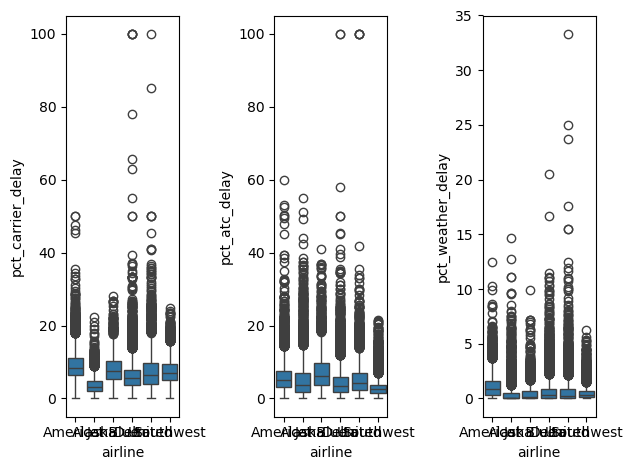

In [76]:
box, ax = plt.subplots(1,3)
sns.boxplot(data=df_cleaned, x='airline', y='pct_carrier_delay', ax = ax[0])
sns.boxplot(data=df_cleaned, x='airline', y='pct_atc_delay', ax = ax[1])
sns.boxplot(data=df_cleaned, x='airline', y='pct_weather_delay', ax = ax[2])
box.set_tight_layout(True)
plt.show()
